<a href="https://colab.research.google.com/github/piyalibanerjee/cs6440/blob/main/pbanerjee32MP2Ex3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# LIBRARY IMPORT
import math
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from google.colab import files
uploaded = files.upload()
FILE_NAME = "COVID-19_Vaccine_Distribution_Allocations_by_Jurisdiction_-_Moderna.csv"
raw_data = pd.read_csv(io.BytesIO(uploaded[FILE_NAME]))
raw_data.head(50)

Saving COVID-19_Vaccine_Distribution_Allocations_by_Jurisdiction_-_Moderna.csv to COVID-19_Vaccine_Distribution_Allocations_by_Jurisdiction_-_Moderna (2).csv


,Jurisdiction,Week of Allocations,1st Dose Allocations,2nd Dose Allocations
0,Alabama,03/01/2021,47700,47700
1,Alaska,03/01/2021,49300,49300
2,American Samoa,03/01/2021,4400,0
3,Arizona,03/01/2021,67600,67600
4,Arkansas,03/01/2021,28900,28900
5,California,03/01/2021,380300,380300
6,Chicago,03/01/2021,26500,26500
7,Colorado,03/01/2021,54100,54100
8,Connecticut,03/01/2021,35800,35800
9,Delaware,03/01/2021,9500,9500


**Data Observations:**

At first glance of the data, there are 4 columns: Jurisdiction (US Jurisdiction, string value), Week of Allocations (date of the Monday of the week the doses are allocated, in the form MM/DD/YYYY), and the number (integer value) of 1st and 2nd doses allocated for that week. 

I also noticed that there are weeks when only one of the doses is allocated for a Jurisdiction. For example, for the week of 03/01/2021, Guam and American Samoa only received allocations for the 1st dose.

In [24]:
ascending_weeks = raw_data["Week of Allocations"][::-1].unique()
week_order_map = dict(zip(ascending_weeks, range(1,len(ascending_weeks)+1)))
cleaned_raw_data = raw_data
cleaned_raw_data["Week Order"]=cleaned_raw_data["Week of Allocations"].map(week_order_map)
data_sorted_by_week_ascending = cleaned_raw_data.sort_values("Week Order")

First, I will investigate if the allocations have been increasing by week. My hypothesis is that the allocations were lower in the first few weeks and as the distribution channels increased, the administration process became more streamlined, and the manufacturing efficiency improved, the allocation numbers would increase over the weeks and eventually plateau and decrease as jurisdictions complete vaccinations. 

In [37]:
week_analysis = data_sorted_by_week_ascending.groupby("Week Order").agg({"1st Dose Allocations": 'sum',"2nd Dose Allocations": 'sum', "Jurisdiction": 'count'})
week_analysis["1st Dose Percentage"] = 100*(week_analysis["1st Dose Allocations"]/week_analysis["1st Dose Allocations"].sum())
week_analysis["2nd Dose Percentage"] = 100*(week_analysis["2nd Dose Allocations"]/week_analysis["2nd Dose Allocations"].sum())
week_analysis

,1st Dose Allocations,2nd Dose Allocations,Jurisdiction,1st Dose Percentage,2nd Dose Percentage
Week Order,,,,,
1,5990000,5948600,63,18.146082,18.125752
2,2047300,2047300,63,6.202083,6.238250
3,2104400,2064400,63,6.375061,6.290355
4,2047200,2047200,63,6.201780,6.237945
5,2150000,2150000,63,6.513202,6.551183
6,2150300,2150300,63,6.514110,6.552097
7,2915180,2881400,63,8.831235,8.779804
8,3430000,3430000,63,10.390828,10.451422
9,3350000,3350000,63,10.148477,10.207657


<Figure size 720x720 with 0 Axes>

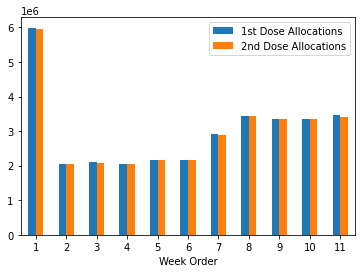

<Figure size 720x720 with 0 Axes>

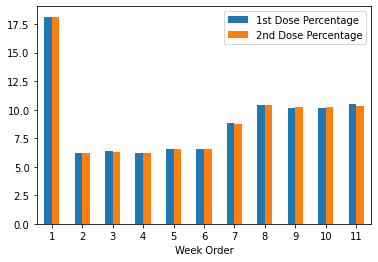

In [43]:
#Visualization of week analysis
fig = plt.figure(figsize=(10,10))
ax = week_analysis[["1st Dose Allocations", "2nd Dose Allocations"]].plot.bar(rot=0)

fig = plt.figure(figsize=(10,10))
ax = week_analysis[["1st Dose Percentage", "2nd Dose Percentage"]].plot.bar(rot=0)

My hypothesis was largely correct with the exception of the first week. As shown in the visualizations, relative to the rest of the weeks, the first week's allocations were extremely high -- over 18% of the total allocations across the weeks! Perhaps Moderna manufacturers have developed and accumulated a high stock in the beginning pre-FDA approval and once it got approved, the doses immediately got bulk-allocated. Another possible explanation is that the initial allocations were overly-ambitious and the distribution channels weren't sufficiently established to handle that load so the allocations had to be lowered significantly the following week.

Besides the first week, allocations remained steady from weeks 2-6, increased between weeks 6-8, and remained steady since then. 

Next, I'll analyze trends by Jurisdiction. 

In [45]:
jurisdiction_analysis = cleaned_raw_data.groupby("Jurisdiction").agg({"1st Dose Allocations": 'sum',"2nd Dose Allocations": 'sum'})
jurisdiction_analysis["1st Dose Percentage"] = 100*(jurisdiction_analysis["1st Dose Allocations"]/jurisdiction_analysis["1st Dose Allocations"].sum())
jurisdiction_analysis["2nd Dose Percentage"] = 100*(jurisdiction_analysis["2nd Dose Allocations"]/jurisdiction_analysis["2nd Dose Allocations"].sum())
jurisdiction_analysis

,1st Dose Allocations,2nd Dose Allocations,1st Dose Percentage,2nd Dose Percentage
Jurisdiction,,,,
Alabama,460300,460300,1.394431,1.402563
Alaska,134000,134000,0.405939,0.408306
American Samoa,12400,0,0.037565,0.000000
Arizona,652400,652400,1.976378,1.987903
Arkansas,279300,279300,0.846110,0.851044
...,...,...,...,...
Virginia,799300,799300,2.421396,2.435517
Washington,699200,699200,2.118154,2.130506
West Virginia,178400,178400,0.540444,0.543596


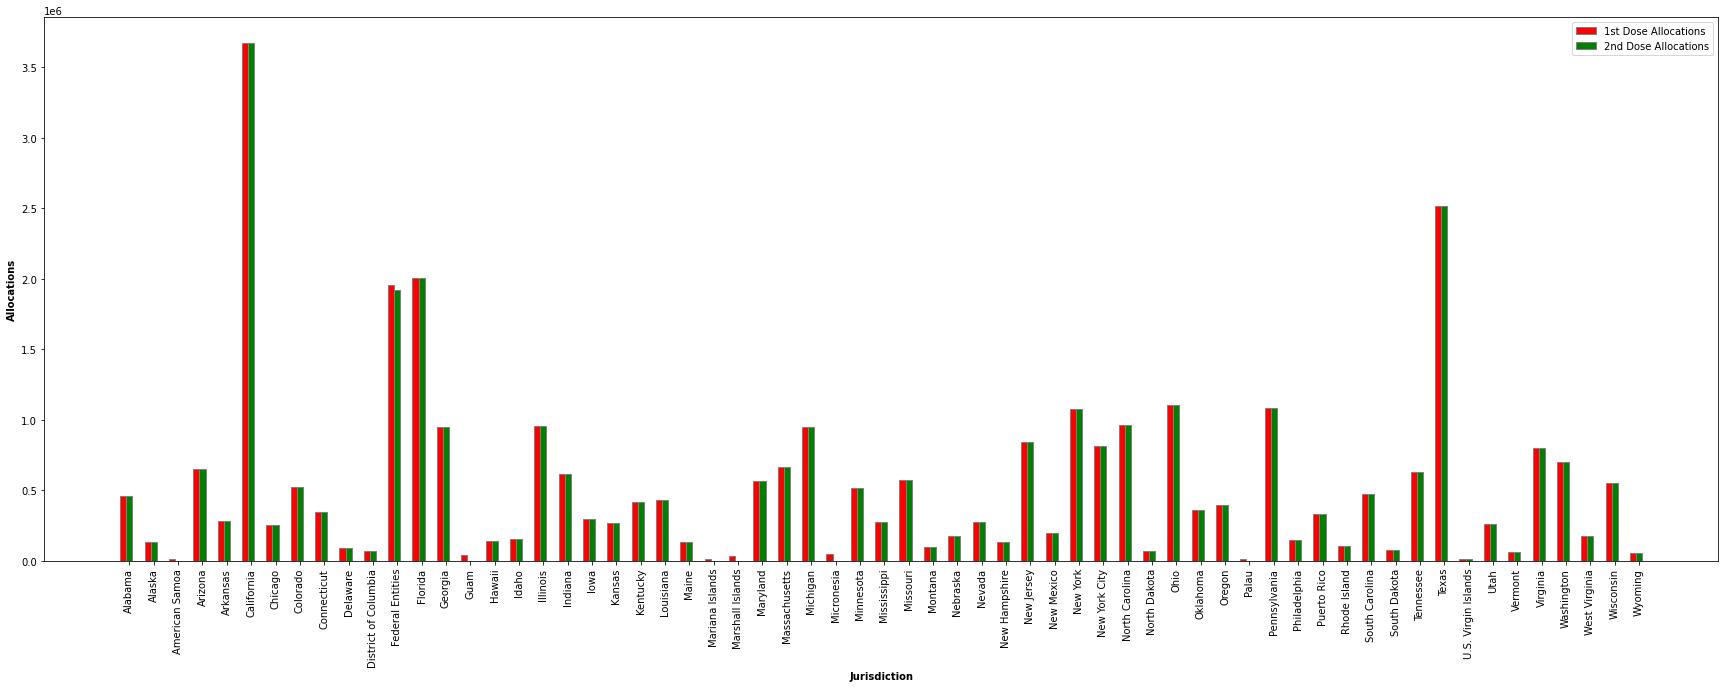

In [65]:
# Visualization of jurisdiction analysis
# Some of the code below was taken from and inspired by this GeeksforGeeks page: https://www.geeksforgeeks.org/bar-plot-in-matplotlib/
fig = plt.subplots(figsize =(30, 10)) 
bar_width = 0.25
br1 = np.arange(len(jurisdiction_analysis['1st Dose Allocations'])) 
br2 = [x + bar_width for x in br1] 

plt.bar(br1, jurisdiction_analysis['1st Dose Allocations'], color ='r', width = bar_width, 
        edgecolor ='grey', label ='1st Dose Allocations') 
plt.bar(br2, jurisdiction_analysis['2nd Dose Allocations'], color ='g', width = bar_width, 
        edgecolor ='grey', label ='2nd Dose Allocations')
plt.xticks([r + bar_width for r in range(63)], jurisdiction_analysis.index.values, rotation='vertical')
plt.legend()
plt.xlabel('Jurisdiction', fontweight ='bold') 
plt.ylabel('Allocations', fontweight ='bold')
plt.show()  
# ax = jurisdiction_analysis[["1st Dose Allocations", "2nd Dose Allocations"]].plot(figsize=(50,10)).bar(x='Jurisdiction', height=[],rot=0)

# fig = plt.figure(figsize=(10,10))
# ax = jurisdiction_analysis[["1st Dose Percentage", "2nd Dose Percentage"]].plot.bar(rot=0)

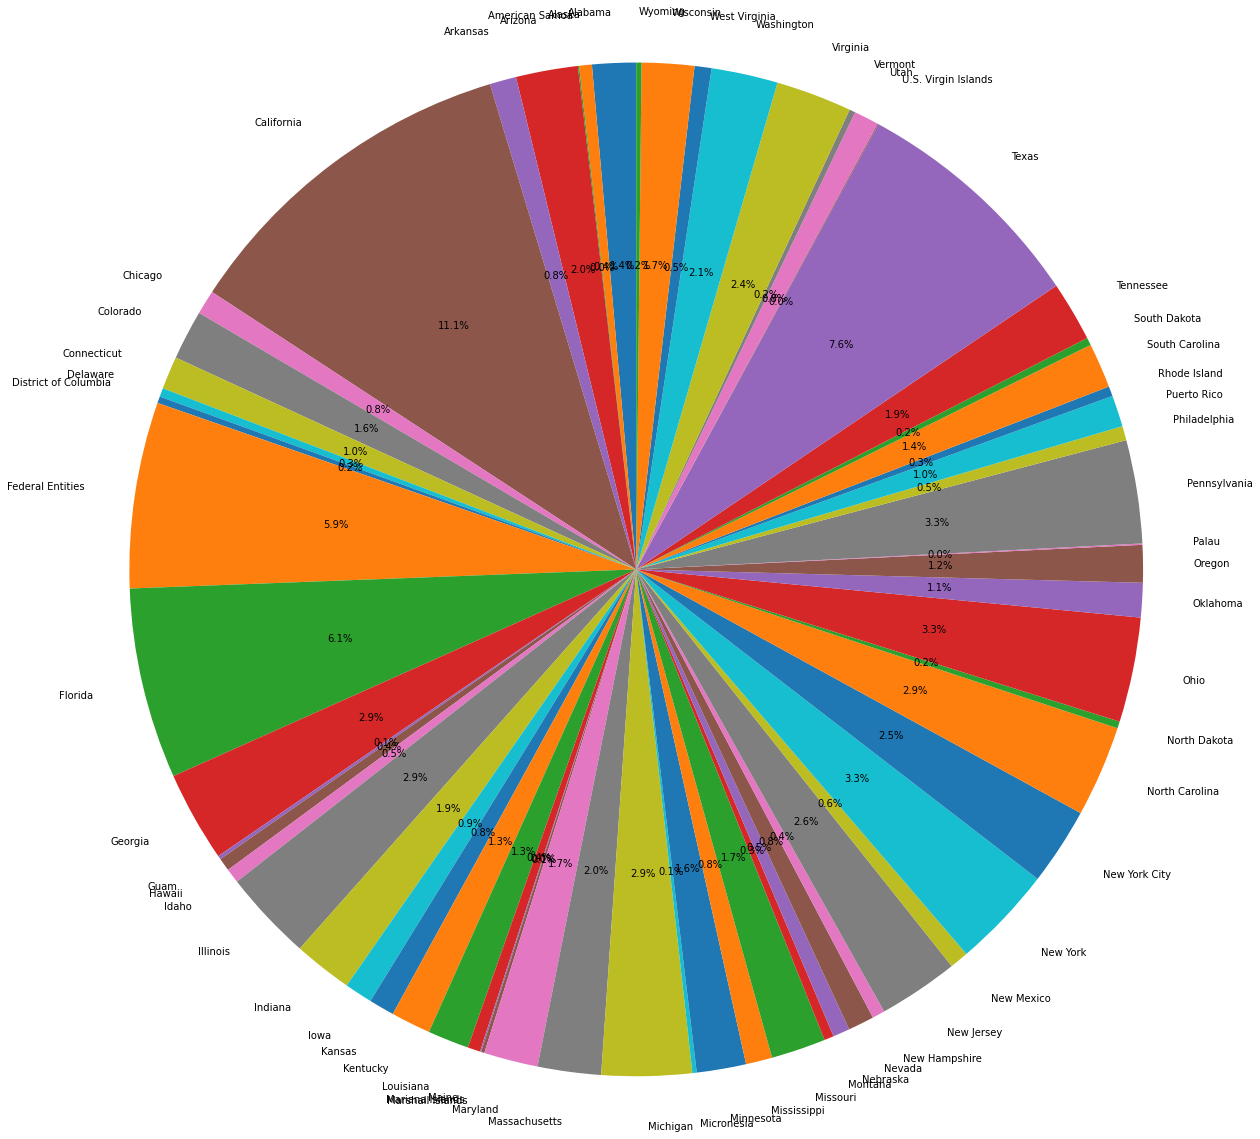

In [68]:
fig1, ax1 = plt.subplots(figsize=(20, 20))
ax1.pie(jurisdiction_analysis["1st Dose Percentage"], labels=jurisdiction_analysis.index.values, autopct='%1.1f%%',startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [70]:
#Percentiles, Mean
jurisdiction_analysis_quantiles = jurisdiction_analysis.quantile(q=[0.25, 0.5, 0.75, 0.9])
jurisdiction_analysis_quantiles

,1st Dose Allocations,2nd Dose Allocations,1st Dose Percentage,2nd Dose Percentage
0.25,132350.0,132350.0,0.400941,0.403279
0.50,329900.0,329900.0,0.999398,1.005226
0.75,659150.0,659150.0,1.996826,2.008471
0.90,1051580.0,1051580.0,3.185652,3.204229


As shown in the quantiles table above, the quantiles for the 1st and 2nd dose allocations data are identical, further confirming that there isn't a significant difference between 1st dose and 2nd dose allocation numbers. Additionally, the quantiles for the 1st and 2nd dose percentages are very low -- less than 3%. This indicates that the majority (75%) of the jurisdictions are receiving far lower allocations than the top 25% of jurisdictions. To further explore this, I added a row for the 90% quantile, which was still a low percentage (~3%).

Next, I will group the jurisdictions by which quantile they fall under, and analyze by quantile.

In [75]:
jurisdiction_analysis['Quantile Group'] = pd.qcut(jurisdiction_analysis['1st Dose Allocations'],
                            q=4,
                            labels=False,
                            precision=0)
jurisdiction_analysis.head(25)

,1st Dose Allocations,2nd Dose Allocations,1st Dose Percentage,2nd Dose Percentage,Quantile Group
Jurisdiction,,,,,
Alabama,460300,460300,1.394431,1.402563,2
Alaska,134000,134000,0.405939,0.408306,1
American Samoa,12400,0,0.037565,0.000000,0
Arizona,652400,652400,1.976378,1.987903,2
Arkansas,279300,279300,0.846110,0.851044,1
California,3671400,3671400,11.122125,11.186983,3
Chicago,255700,255700,0.774617,0.779134,1
Colorado,522000,522000,1.581345,1.590566,2
Connecticut,345700,345700,1.047262,1.053369,2


**Quantile Group 0 (0-25th percentile) Analysis**



In [80]:
# Quantile Group 0 (0-25th percentile) Analysis
group_0 = jurisdiction_analysis[jurisdiction_analysis["Quantile Group"]==0]
group_0

,1st Dose Allocations,2nd Dose Allocations,1st Dose Percentage,2nd Dose Percentage,Quantile Group
Jurisdiction,,,,,
American Samoa,12400,0,0.037565,0.000000,0
Delaware,91600,91600,0.277493,0.279111,0
District of Columbia,69300,69300,0.209937,0.211161,0
Guam,38200,0,0.115723,0.000000,0
Maine,132300,132300,0.400789,0.403126,0
Mariana Islands,12800,0,0.038776,0.000000,0
Marshall Islands,34200,0,0.103605,0.000000,0
Micronesia,45400,0,0.137535,0.000000,0
Montana,100400,100400,0.304151,0.305925,0


In [82]:
group_0.describe()

,1st Dose Allocations,2nd Dose Allocations,1st Dose Percentage,2nd Dose Percentage,Quantile Group
count,16.000000,16.000000,16.000000,16.000000,16.0
mean,58487.500000,48662.500000,0.177182,0.148278,0.0
std,37262.507967,46520.330681,0.112883,0.141750,0.0
min,10600.000000,0.000000,0.032112,0.000000,0.0
25%,29200.000000,0.000000,0.088458,0.000000,0.0
50%,58900.000000,58900.000000,0.178431,0.179472,0.0
75%,82975.000000,82975.000000,0.251364,0.252830,0.0
max,132300.000000,132300.000000,0.400789,0.403126,0.0


In [83]:
group_0[group_0['2nd Dose Allocations']==0]

,1st Dose Allocations,2nd Dose Allocations,1st Dose Percentage,2nd Dose Percentage,Quantile Group
Jurisdiction,,,,,
American Samoa,12400,0,0.037565,0.0,0
Guam,38200,0,0.115723,0.0,0
Mariana Islands,12800,0,0.038776,0.0,0
Marshall Islands,34200,0,0.103605,0.0,0
Micronesia,45400,0,0.137535,0.0,0
Palau,14200,0,0.043017,0.0,0


Observations from basic stats of Group 0:
* The min and 25th percentile of this group is 0 for 2nd dose allocations. The jurisdictions that haven't received 2nd dose allocations yet are American Samoa, Guam, Mariana Islands, Marshall Islands, Micronesia, and Palau. All of these jurisdictions are islands and are US territories. This could explain how it may be difficult to transport doses and the infrastructure may not be set up yet on the islands to handle the 2nd dose. 
* Maine has the maximum in this category for both 1st and 2nd dose allocations.
* The US Virgin Islands has the minimum for the 1st dose. Although the islands with 0 2nd dose allocations had higher first dose allocations than US Virgin Islands, the US Virgin Islands had 2nd dose allocations already. 
* The jurisdictions in this group with non-0 2nd dose allocations have an equal number of 1st and 2nd dose allocations.

Jurisdiction
American Samoa          AxesSubplot(0.125,0.125;0.775x0.755)
Delaware                AxesSubplot(0.125,0.125;0.775x0.755)
District of Columbia    AxesSubplot(0.125,0.125;0.775x0.755)
Guam                    AxesSubplot(0.125,0.125;0.775x0.755)
Maine                   AxesSubplot(0.125,0.125;0.775x0.755)
Mariana Islands         AxesSubplot(0.125,0.125;0.775x0.755)
Marshall Islands        AxesSubplot(0.125,0.125;0.775x0.755)
Micronesia              AxesSubplot(0.125,0.125;0.775x0.755)
Montana                 AxesSubplot(0.125,0.125;0.775x0.755)
North Dakota            AxesSubplot(0.125,0.125;0.775x0.755)
Palau                   AxesSubplot(0.125,0.125;0.775x0.755)
Rhode Island            AxesSubplot(0.125,0.125;0.775x0.755)
South Dakota            AxesSubplot(0.125,0.125;0.775x0.755)
U.S. Virgin Islands     AxesSubplot(0.125,0.125;0.775x0.755)
Vermont                 AxesSubplot(0.125,0.125;0.775x0.755)
Wyoming                 AxesSubplot(0.125,0.125;0.775x0.755)
Name: 1st D

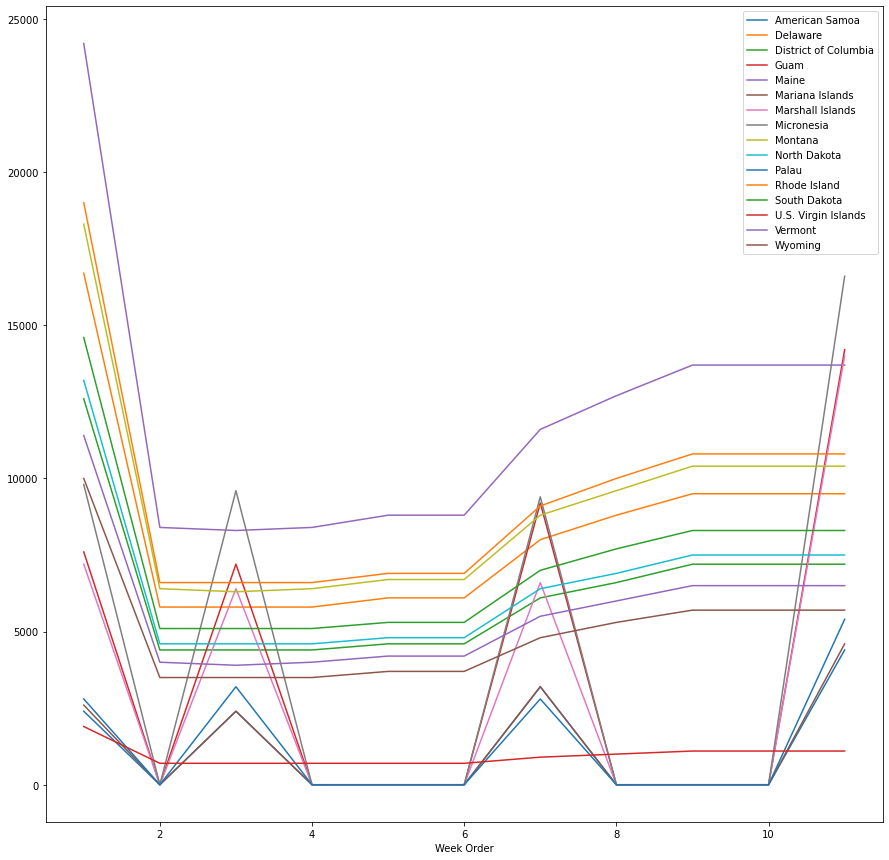

In [105]:
#Group 0 Week Analysis
group_0_full_data = cleaned_raw_data[cleaned_raw_data["Jurisdiction"].isin(group_0.index.values)]
group_0_full_data.set_index('Week Order', inplace=True)

group_0_full_data.groupby('Jurisdiction')["1st Dose Allocations"].plot(legend = True, figsize=(15,15))

The line plot above shows there are 2 distinct groups within group 0 based on allocation trends with time.

In [107]:
group_0_full_data[group_0_full_data['1st Dose Allocations']==0]["Jurisdiction"].unique()

array(['American Samoa', 'Guam', 'Mariana Islands', 'Marshall Islands',
       'Micronesia', 'Palau'], dtype=object)

The first group had some weeks with 0 first dose allocations given: Weeks 2,4,5,6,8,9,and 10 -- 7 out of the 11 weeks of allocation. This group consisted of the same island territories that have not received any 2nd doses yet. This supports the theory that the infrastucture to support vaccine distribution may not be set up fully in these small islands yet and it may be difficult to transport doses to those remote locations. There's also a chance that US territories are not as high-priority as the states for vaccine distribution/allocation.

The second group includes all other jurisdictions in Group 0 (with Virgin Islands being an outlier). The trend for this group aligns with the overall trend observed in the first week analysis done in this report. 

**Quantile Group 1 (25-50th percentile) Analysis**

In [110]:
# Quantile Group 1 (25-50th percentile) Analysis
group_1=jurisdiction_analysis[jurisdiction_analysis["Quantile Group"]==1]
group_1

,1st Dose Allocations,2nd Dose Allocations,1st Dose Percentage,2nd Dose Percentage,Quantile Group
Jurisdiction,,,,,
Alaska,134000,134000,0.405939,0.408306,1
Arkansas,279300,279300,0.846110,0.851044,1
Chicago,255700,255700,0.774617,0.779134,1
Hawaii,136900,136900,0.414724,0.417143,1
Idaho,153000,153000,0.463498,0.466200,1
Iowa,293700,293700,0.889734,0.894922,1
Kansas,268200,268200,0.812484,0.817222,1
Mississippi,277500,277500,0.840657,0.845560,1
Nebraska,177300,177300,0.537112,0.540244,1


In [111]:
group_1.describe()

,1st Dose Allocations,2nd Dose Allocations,1st Dose Percentage,2nd Dose Percentage,Quantile Group
count,16.000000,16.000000,16.000000,16.000000,16.0
mean,218825.000000,218825.000000,0.662908,0.666773,1.0
std,67332.483493,67332.483493,0.203977,0.205166,0.0
min,132400.000000,132400.000000,0.401092,0.403431,1.0
25%,152375.000000,152375.000000,0.461604,0.464296,1.0
50%,226750.000000,226750.000000,0.686916,0.690921,1.0
75%,275625.000000,275625.000000,0.834977,0.839846,1.0
max,329900.000000,329900.000000,0.999398,1.005226,1.0


Observations from basic stats of Group 1:


*   Just like the jurisdictions in Group 0 that have already received 2nd dose allocations, each jurisdictions in Group 1 have the same number of 1st and 2nd dose allocations, though they differ from each other based on jurisdiction. This makes sense since individuals need both doses of vaccines, so the allocations should be equal.
*   The standard deviation of this group is higher than that of Group 0 (37,262 for Group 0 vs 67,332 for Group 1).
*   Puerto Rico has the highest allocations (329,900 for each dose).
*  New Hampshire has the lowest allocations (132,400 for each dose).



Jurisdiction
Alaska           AxesSubplot(0.125,0.125;0.775x0.755)
Arkansas         AxesSubplot(0.125,0.125;0.775x0.755)
Chicago          AxesSubplot(0.125,0.125;0.775x0.755)
Hawaii           AxesSubplot(0.125,0.125;0.775x0.755)
Idaho            AxesSubplot(0.125,0.125;0.775x0.755)
Iowa             AxesSubplot(0.125,0.125;0.775x0.755)
Kansas           AxesSubplot(0.125,0.125;0.775x0.755)
Mississippi      AxesSubplot(0.125,0.125;0.775x0.755)
Nebraska         AxesSubplot(0.125,0.125;0.775x0.755)
Nevada           AxesSubplot(0.125,0.125;0.775x0.755)
New Hampshire    AxesSubplot(0.125,0.125;0.775x0.755)
New Mexico       AxesSubplot(0.125,0.125;0.775x0.755)
Philadelphia     AxesSubplot(0.125,0.125;0.775x0.755)
Puerto Rico      AxesSubplot(0.125,0.125;0.775x0.755)
Utah             AxesSubplot(0.125,0.125;0.775x0.755)
West Virginia    AxesSubplot(0.125,0.125;0.775x0.755)
Name: 1st Dose Allocations, dtype: object

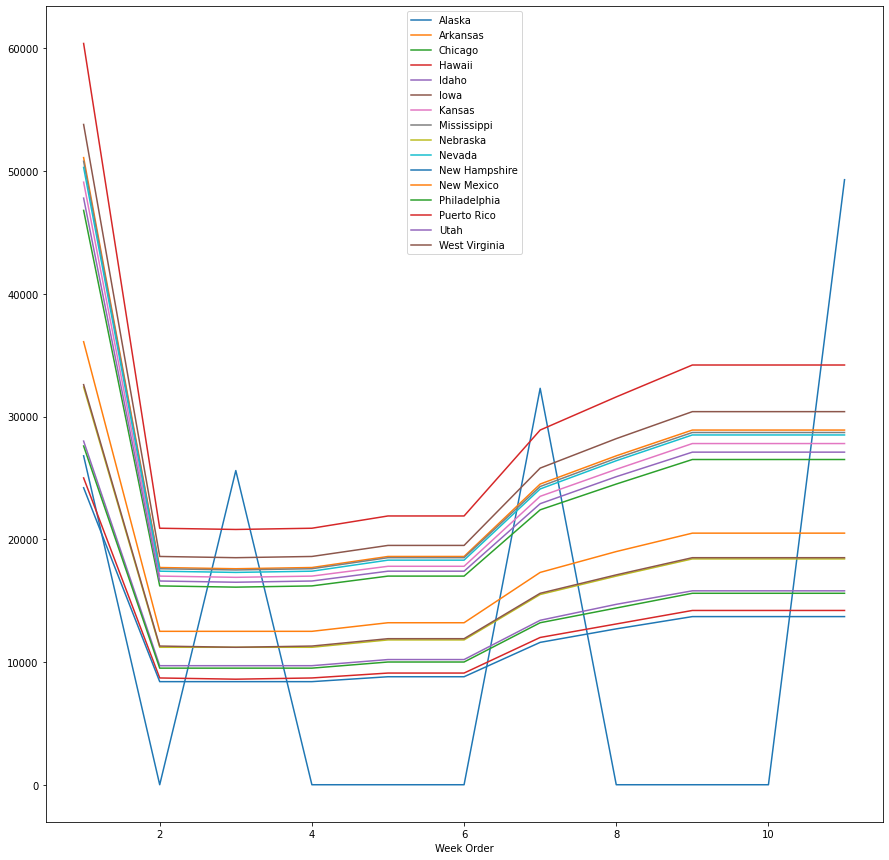

In [112]:
#Group 1 Week Analysis
group_1_full_data = cleaned_raw_data[cleaned_raw_data["Jurisdiction"].isin(group_1.index.values)]
group_1_full_data.set_index('Week Order', inplace=True)

group_1_full_data.groupby('Jurisdiction')["1st Dose Allocations"].plot(legend = True, figsize=(15,15))

In [114]:
#There's an outlier clearly seen by the line plot above. Let's find out which jurisdiction that corresponds to
group1_outlier = group_1_full_data[group_1_full_data['1st Dose Allocations']==0]['Jurisdiction'].unique()
group1_outlier

array(['Alaska'], dtype=object)

Alaska is the outlier! The trends for Alaska are the same as that of the island territories analyzed in Group 0. Besides Alaska, the rest of the jurisdictions in Group 1 follow the same trend as in the first overall weekly analysis in the beginning of this report. 

**Quantile Group 2 (50-75th percentile) Analysis**

In [115]:
# Quantile Group 2 (50-75th percentile) Analysis
group_2 = jurisdiction_analysis[jurisdiction_analysis["Quantile Group"]==2]
group_2

,1st Dose Allocations,2nd Dose Allocations,1st Dose Percentage,2nd Dose Percentage,Quantile Group
Jurisdiction,,,,,
Alabama,460300,460300,1.394431,1.402563,2
Arizona,652400,652400,1.976378,1.987903,2
Colorado,522000,522000,1.581345,1.590566,2
Connecticut,345700,345700,1.047262,1.053369,2
Indiana,618800,618800,1.874590,1.885522,2
Kentucky,419000,419000,1.269317,1.276719,2
Louisiana,434400,434400,1.315970,1.323644,2
Maryland,569300,569300,1.724635,1.734692,2
Minnesota,519000,519000,1.572257,1.581425,2


In [116]:
group_2.describe()

,1st Dose Allocations,2nd Dose Allocations,1st Dose Percentage,2nd Dose Percentage,Quantile Group
count,15.000000,15.000000,15.000000,15.000000,15.0
mean,501593.333333,501593.333333,1.519525,1.528386,2.0
std,98270.599198,98270.599198,0.297701,0.299437,0.0
min,345700.000000,345700.000000,1.047262,1.053369,2.0
25%,426700.000000,426700.000000,1.292643,1.300181,2.0
50%,519000.000000,519000.000000,1.572257,1.581425,2.0
75%,572000.000000,572000.000000,1.732815,1.742919,2.0
max,652400.000000,652400.000000,1.976378,1.987903,2.0


Observations from basic stats of Group 2:
* Group 2 has a higher standard deviation than Group 0 and 1, indicating we may see some interesting trends or outliers.
* Arizona has the highest number of allocations in this group -- 652,400 allocations of each dose.
* Connecticut has the minimum number of allocations with 345,700 allocations of each dose.
* There is only one jurisdiction in this list from the West Coast of the US: Oregon. 
* As with Group 1, the numbers of 1st and 2nd dose allocations are equal across jurisdictions.

Jurisdiction
Alabama           AxesSubplot(0.125,0.125;0.775x0.755)
Arizona           AxesSubplot(0.125,0.125;0.775x0.755)
Colorado          AxesSubplot(0.125,0.125;0.775x0.755)
Connecticut       AxesSubplot(0.125,0.125;0.775x0.755)
Indiana           AxesSubplot(0.125,0.125;0.775x0.755)
Kentucky          AxesSubplot(0.125,0.125;0.775x0.755)
Louisiana         AxesSubplot(0.125,0.125;0.775x0.755)
Maryland          AxesSubplot(0.125,0.125;0.775x0.755)
Minnesota         AxesSubplot(0.125,0.125;0.775x0.755)
Missouri          AxesSubplot(0.125,0.125;0.775x0.755)
Oklahoma          AxesSubplot(0.125,0.125;0.775x0.755)
Oregon            AxesSubplot(0.125,0.125;0.775x0.755)
South Carolina    AxesSubplot(0.125,0.125;0.775x0.755)
Tennessee         AxesSubplot(0.125,0.125;0.775x0.755)
Wisconsin         AxesSubplot(0.125,0.125;0.775x0.755)
Name: 1st Dose Allocations, dtype: object

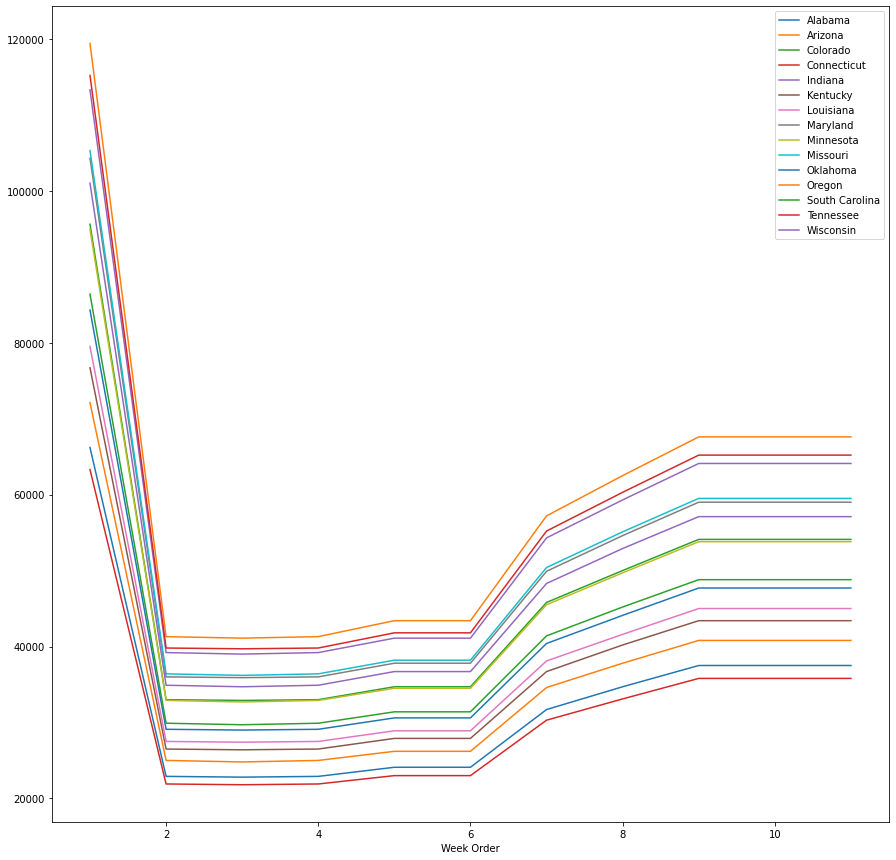

In [118]:
#Group 2 Week Analysis
group_2_full_data = cleaned_raw_data[cleaned_raw_data["Jurisdiction"].isin(group_2.index.values)]
group_2_full_data.set_index('Week Order', inplace=True)

group_2_full_data.groupby('Jurisdiction')["1st Dose Allocations"].plot(legend = True, figsize=(15,15))

Contrary to what the high standard deviation suggested, there doesn't seem to be any outliers based on the line plot above. All jurisdictions in Group 2 follow the same trend as that of the overall weekly analysis done at the beginning of the report. All jurisdictions in Group 2 are within the continental US, which likely makes transportation easier. The allocations policy may be the same for these jurisdictions and are scaled based on population size, explaining the similarities in trends throughout the weeks.

**Quantile Group 3 75-100th percentile) Analysis**

In [119]:
# Quantile Group 3 75-100th percentile) Analysis
group_3 = jurisdiction_analysis[jurisdiction_analysis["Quantile Group"]==3]
group_3

,1st Dose Allocations,2nd Dose Allocations,1st Dose Percentage,2nd Dose Percentage,Quantile Group
Jurisdiction,,,,,
California,3671400,3671400,11.122125,11.186983,3
Federal Entities,1956880,1922700,5.928165,5.858586,3
Florida,2008300,2008300,6.083936,6.119414,3
Georgia,952000,952000,2.883985,2.900803,3
Illinois,952900,952900,2.886711,2.903545,3
Massachusetts,665900,665900,2.017275,2.029038,3
Michigan,948000,948000,2.871867,2.888615,3
New Jersey,843800,843800,2.556204,2.571111,3
New York,1074400,1074400,3.254783,3.273763,3


In [120]:
group_3.describe()

,1st Dose Allocations,2nd Dose Allocations,1st Dose Percentage,2nd Dose Percentage,Quantile Group
count,1.600000e+01,1.600000e+01,16.000000,16.000000,16.0
mean,1.315561e+06,1.313425e+06,3.985356,4.002087,3.0
std,8.205944e+05,8.188562e+05,2.485905,2.495106,0.0
min,6.659000e+05,6.659000e+05,2.017275,2.029038,3.0
25%,8.367500e+05,8.367500e+05,2.534847,2.549629,3.0
50%,9.566000e+05,9.566000e+05,2.897920,2.914819,3.0
75%,1.315495e+06,1.306950e+06,3.985155,3.982358,3.0
max,3.671400e+06,3.671400e+06,11.122125,11.186983,3.0


Observations from basic stats of Group 3:
* Group 3 has the highest standard deviation (order of magnitude higher) than the rest of the groups. This shows that the standard deviation increases by percentile segment. 
* California, Federal Entities, Florida, and Texas were the outliers with the highest number of total doses allocated based on the bar chart at the beginning of the report. The standard deviation is probably very high due to these outliers.
* California has the max number of doses allocated in Group 2, with 3,6771,400 allocations per dose
* Massachusetts has the min number of doses allocated in Group 2, with 665,900 allocations per dose
* Similar to Groups 1 and 2, all jurisdictions in Group 3 have the same number of allocations for the 1st and 2nd dose since individuals require both doses for the Moderna vaccine to be fully effective.


Jurisdiction
California          AxesSubplot(0.125,0.125;0.775x0.755)
Federal Entities    AxesSubplot(0.125,0.125;0.775x0.755)
Florida             AxesSubplot(0.125,0.125;0.775x0.755)
Georgia             AxesSubplot(0.125,0.125;0.775x0.755)
Illinois            AxesSubplot(0.125,0.125;0.775x0.755)
Massachusetts       AxesSubplot(0.125,0.125;0.775x0.755)
Michigan            AxesSubplot(0.125,0.125;0.775x0.755)
New Jersey          AxesSubplot(0.125,0.125;0.775x0.755)
New York            AxesSubplot(0.125,0.125;0.775x0.755)
New York City       AxesSubplot(0.125,0.125;0.775x0.755)
North Carolina      AxesSubplot(0.125,0.125;0.775x0.755)
Ohio                AxesSubplot(0.125,0.125;0.775x0.755)
Pennsylvania        AxesSubplot(0.125,0.125;0.775x0.755)
Texas               AxesSubplot(0.125,0.125;0.775x0.755)
Virginia            AxesSubplot(0.125,0.125;0.775x0.755)
Washington          AxesSubplot(0.125,0.125;0.775x0.755)
Name: 1st Dose Allocations, dtype: object

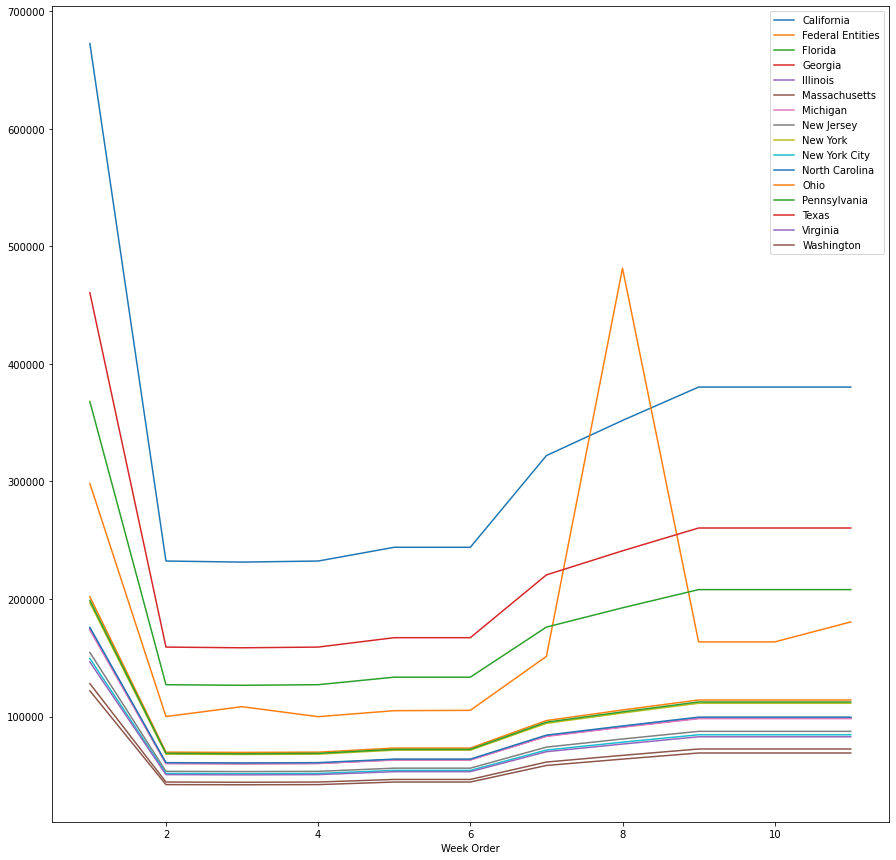

In [121]:
#Group 3 Week Analysis
group_3_full_data = cleaned_raw_data[cleaned_raw_data["Jurisdiction"].isin(group_3.index.values)]
group_3_full_data.set_index('Week Order', inplace=True)

group_3_full_data.groupby('Jurisdiction')["1st Dose Allocations"].plot(legend = True, figsize=(15,15))

The trends in the above line plot are all very similar to the first weekly analysis done in the report except for one outlier that had a spike of first allocations given on week 8 -- I'll dive deeper into which jurisdiction that outlier represents.

In [127]:
group_3_full_data[group_3_full_data.index.isin([8]) & (group_3_full_data['1st Dose Allocations']>400000)].Jurisdiction

Week Order
8    Federal Entities
Name: Jurisdiction, dtype: object

In [138]:
list(week_order_map.keys())[list(week_order_map.values()).index(8)]

'02/08/2021'

For the week of 02/08/2021, the Federal Entities had a spike in allocations. From a quick Google search, I found that "U.S. totals include additional vaccine doses that have been allocated to federal entities, which include the Bureau of Prisons, Department of Defense, Department of State, Indian Health Service, Veterans Affairs, and Department of Homeland Security" according to the Kaiser Family Foundation (Weekly COVID-19 Vaccine First Dose Allocations, 2021).


**CONCLUSION**

The Moderna vaccine has 2 doses which are both required for the vaccine to be effective. Therefore, the weekly allocations for the 1st and 2nd dose are typically the same for each jurisdiction. The small, remote island territory jurisdictions have not had any 2nd doses allocated yet and were part of the first quantile group (0-25th percentile). The infrastructure is probably not fully established yet to transport vaccines to these remote locations and distribute/administer them. As the infrastructure gets better established, I'd expect the allocations to increase drastically for these islands (similar to the additional doses delivered for the federal entities). 

The overall week-by-week allocation trend is roughly the same for all other jurisdictions, with relatively high allocations the first week, huge dip in the second week, steady increase, and plateau for the remaining weeks. The differences in magnitude of allocations may be associated with the population size and distance from manufacturing locations. Data about population size, as well as Pfizer vaccine allocations would have been interesting and would have added a lot of value to the analysis done in this report. Perhaps allocation plans of the Pfizer vaccine are coordinated with the Moderna vaccine allocation plan - it would be interesting to see correlations.

The spike on the week of 02/08/2021 for the Federal Entities and the general increase for all other jurisdictions is the result of a vaccine supply increase mandated by the Biden-Harris administration, which was effective from the week of 02/01/2021. This explains why the overall weekly allocations started increasing dramatically at week 7 (02/01/2021). They've increased the weekly doses by 10.5 million nationwide, according to the White House Briefing Room report (House, 2021).

**REFERENCES**

1. House, T. W. (2021, February 2). FACT SHEET: President Biden Announces Increased Vaccine Supply, Initial Launch of the Federal Retail Pharmacy Program, and Expansion of FEMA Reimbursement to States. The White House. https://www.whitehouse.gov/briefing-room/statements-releases/2021/02/02/fact-sheet-president-biden-announces-increased-vaccine-supply-initial-launch-of-the-federal-retail-pharmacy-program-and-expansion-of-fema-reimbursement-to-states/
2. Weekly COVID-19 Vaccine First Dose Allocations. (2021, February 26). KFF. https://www.kff.org/other/state-indicator/weekly-covid-19-vaccine-first-dose-allocations/?currentTimeframe=0&sortModel=%7B%22colId%22%3A%22Location%22%2C%22sort%22%3A%22asc%22%7D